In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('Titanic.csv')

# 1. How big is the data?

In [3]:
titanic.shape

(891, 12)

# 2. How does the data look like?

In [4]:
# print(titanic.head()) # sometimes there will be bias in the data
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
836,837,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S
579,580,1,3,"Jussila, Mr. Eiriik",male,32.0,0,0,STON/O 2. 3101286,7.9250,NaN,S
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C


# 3. What does the data type of cols?

In [5]:
titanic.info()
# can optimize the data by changing the data type of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 4. Are there any missing values?

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 5. How does the data looks mathematically?

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 6. Are there any duplicate value?

In [8]:
titanic.duplicated().sum()

np.int64(0)

# 7. How is the correlation between the columns

In [9]:
titanic.corr(numeric_only=True)['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

# Univariate Analysis
---
* In this section, we will perform univariate analysis on the dataset.
## 1. Categorical Data

### a. Countplot

<Axes: xlabel='Pclass', ylabel='count'>

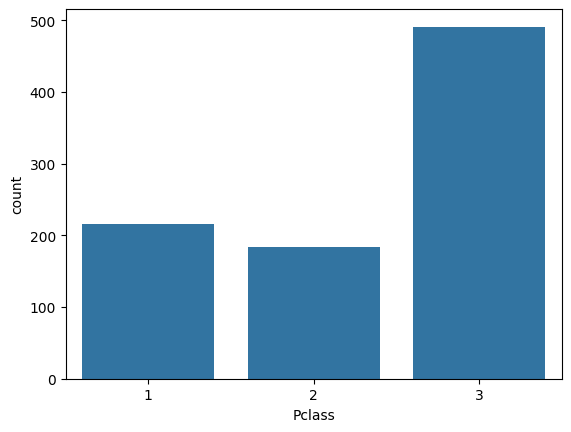

In [10]:
# sns.countplot(titanic, x='Survived')
sns.countplot(titanic, x='Pclass')

### b. Piechart

<Axes: ylabel='count'>

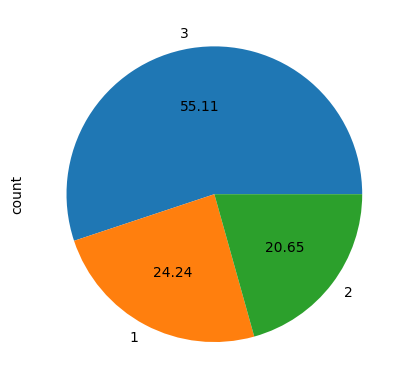

In [11]:
# titanic['Survived'].value_counts().plot(kind='pie', autopct='%.2f')
titanic['Pclass'].value_counts().plot(kind='pie', autopct='%.2f')
# titanic['Sex'].value_counts().plot(kind='pie', autopct='%.2f')

---

## 2. Numerical Data

### a. Histogram

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

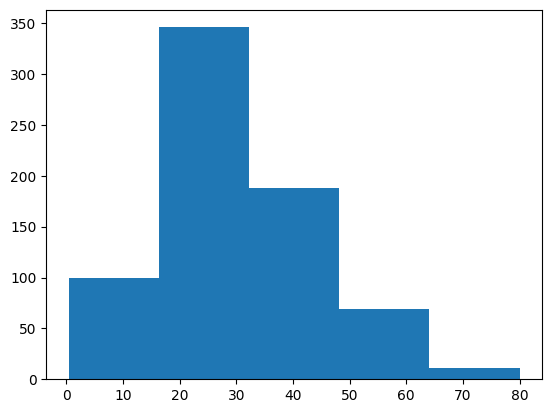

In [12]:
plt.hist(titanic['Age'], bins=5)

### b. Distplot

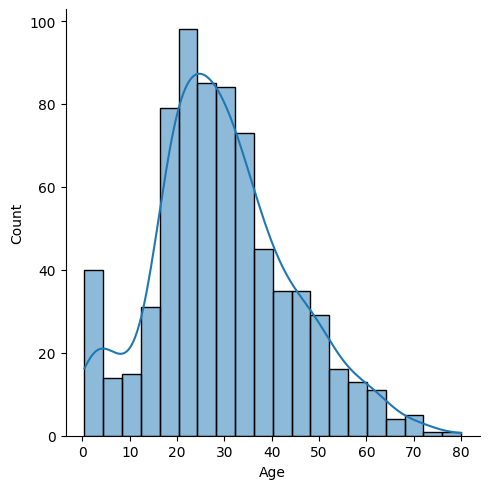

In [13]:
sns.displot(titanic['Age'], kde=True)
# kde - kernel density estimation, its a way to estimate the underlying probability density function of a random variable. 
# it shows the probability density of the data at different points.

### c. Boxplot

<Axes: xlabel='Age'>

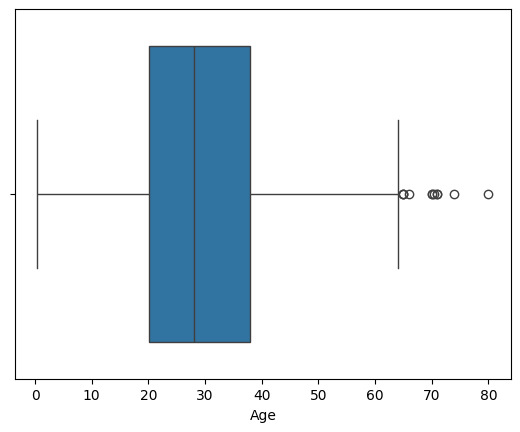

In [14]:
# sns.boxplot(titanic['Fare'], orient='h')
sns.boxplot(titanic['Age'], orient='h')

In [15]:
titanic['Age'].skew() # Skewness, which is a measure of the asymmetry of the distribution, if it is close to 0, then the distribution is symmetrical.
titanic['Age'].kurtosis() # Kurtosis, which is a measure of the "tailedness" or "peakedness" of the distribution, if it is close to 3, then the distribution is normal.

np.float64(0.17827415364210353)

# Multivariate Analysis
---

In [16]:
tips = sns.load_dataset('tips')

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
flights = sns.load_dataset('flights') # flights dataset

In [23]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [25]:
iris = sns.load_dataset('iris') # flowers dataset

In [24]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1. Scatterplot(Numerical-Numerical)

<Axes: xlabel='total_bill', ylabel='tip'>

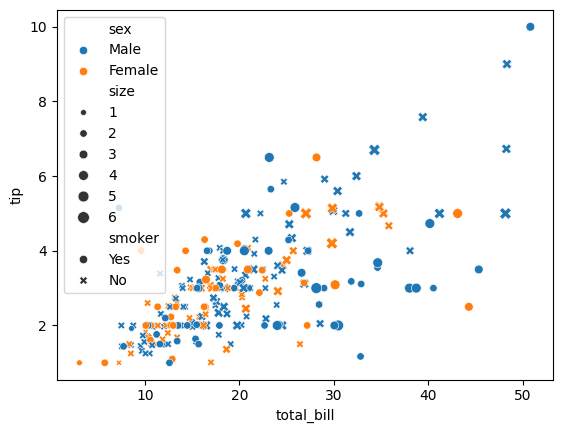

In [32]:
sns.scatterplot(tips, x='total_bill', y='tip', hue='sex', style='smoker', size='size')

### 2. Barplot(Numerical - Categorical)

<Axes: xlabel='Pclass', ylabel='Age'>

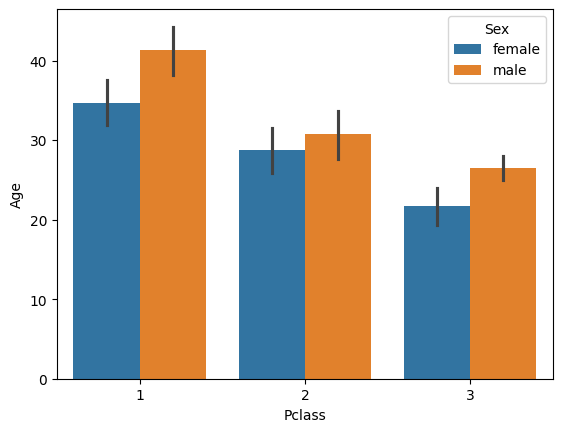

In [37]:
sns.barplot(titanic, x='Pclass', y='Age', hue='Sex')

### 3. Boxplot(Numerical-Categorical)

<Axes: xlabel='Age', ylabel='Sex'>

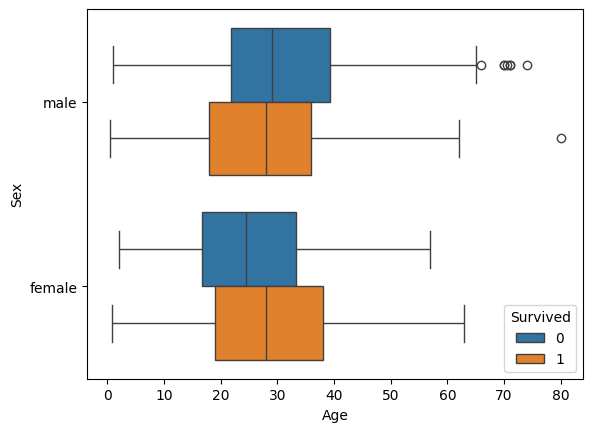

In [41]:
sns.boxplot(titanic, y='Sex', x='Age', hue='Survived', orient='h')

### 4. Distplot(Numerical-Categorical)

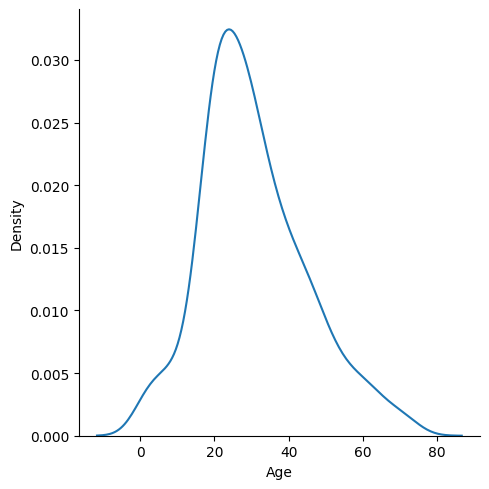

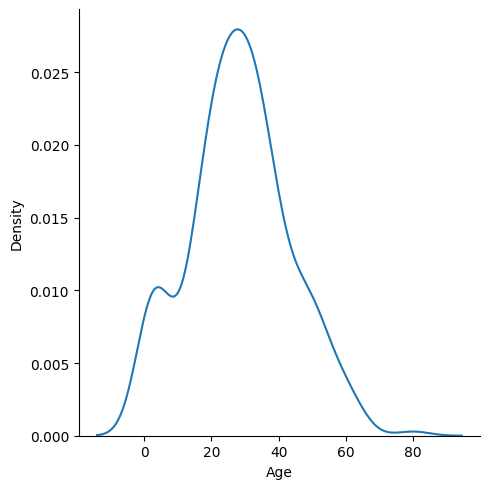

In [50]:
sns.displot(titanic[titanic['Survived'] == 0], x='Age', kind='kde')
sns.displot(titanic[titanic['Survived'] == 1], x='Age', kind='kde')

### 5. Heatmap(Categorical-Categorical)

In [52]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [56]:
df = pd.crosstab(titanic['Pclass'], titanic['Survived'])

<Axes: xlabel='Survived', ylabel='Pclass'>

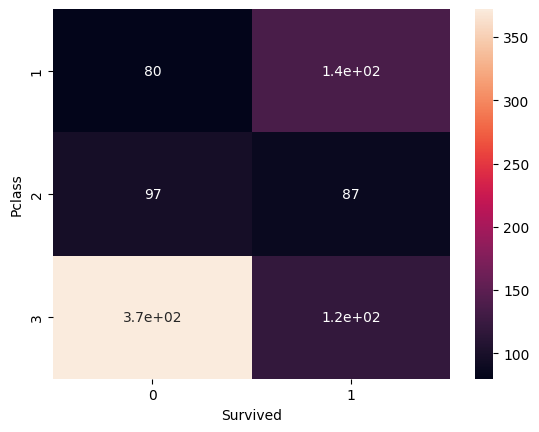

In [58]:
sns.heatmap(df, annot=True)

In [62]:
titanic.groupby('Pclass').mean(numeric_only=True)['Survived']
# agg function failed [how->mean,dtype->object]?

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

### 6. Clustermap(Categorical-Categorical)

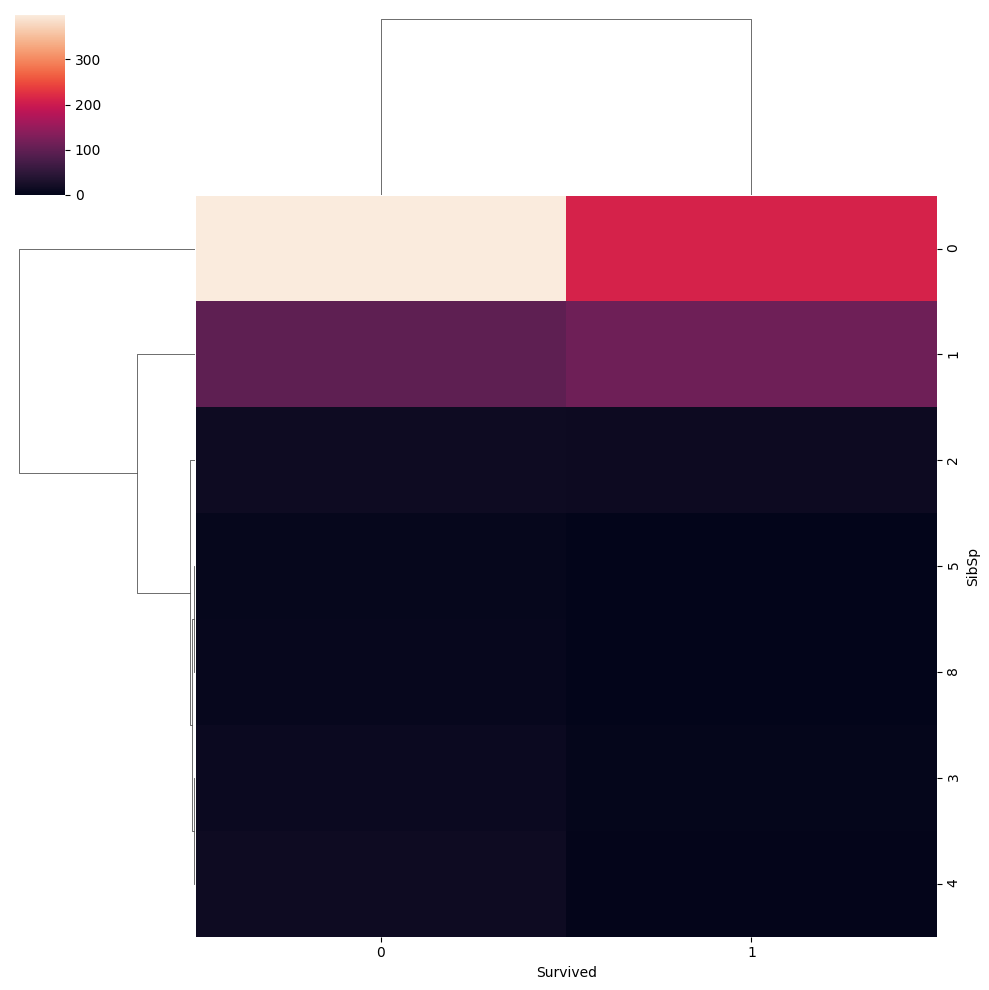

In [70]:
sns.clustermap(pd.crosstab(titanic['SibSp'], titanic['Survived']))

### 7. Pairplot

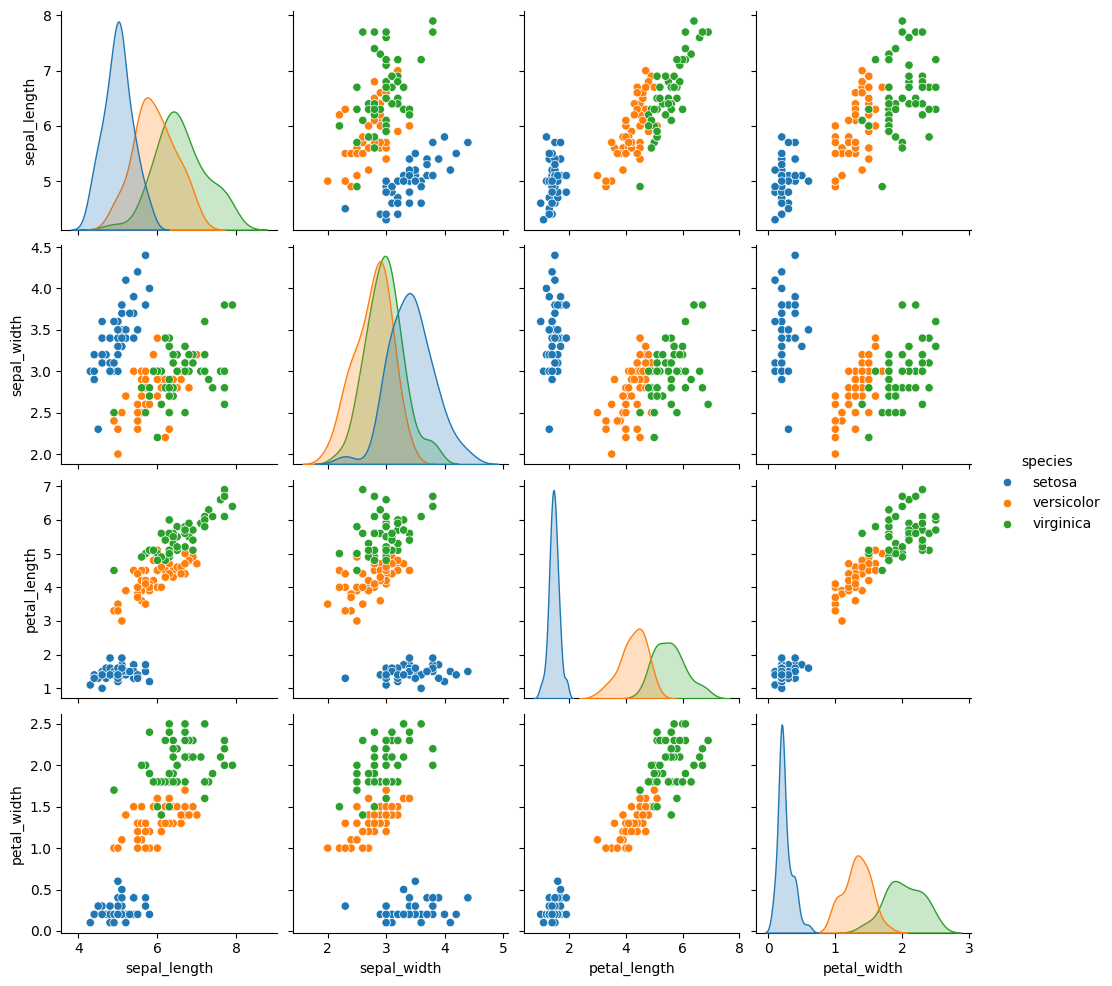

In [73]:
# it detects every numerical col in data and create the scatter plot of each columns
sns.pairplot(iris, hue='species')

### 8. Lineplot(Numerical-Numerical)

<Axes: xlabel='year', ylabel='passengers'>

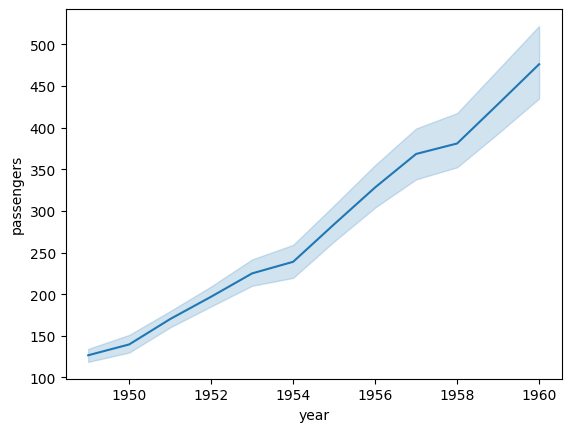

In [82]:
# if x axis is a time series data
# flights.head()
new_df = flights.groupby('year').sum(numeric_only=True).reset_index()
sns.lineplot(flights, x='year', y='passengers')

C:\Users\Hp\AppData\Local\Temp\ipykernel_4180\1314982076.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(flights.pivot_table(values='passengers', index='month', columns='year'))


<Axes: xlabel='year', ylabel='month'>

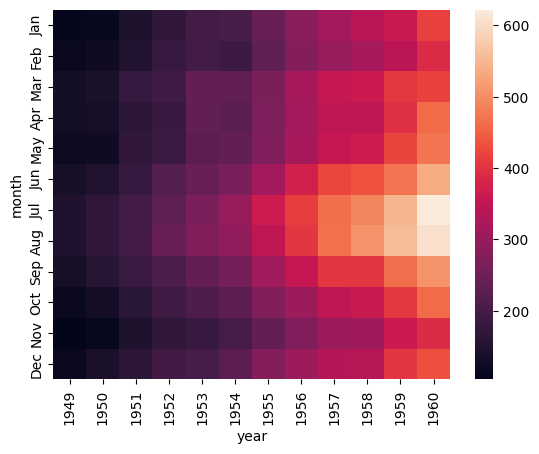

In [84]:
sns.heatmap(flights.pivot_table(values='passengers', index='month', columns='year'))